        MACHINE LEARNING | NATURAL LANGUAGE PROCESSING EXAM - Ahaan Ray Sarkar & Lukas Nissen Molvær

Task 1.1: Classification

In [1]:
#a
import pandas as pd

# Loading the dataset
file_path = 'C:/Users/lukas/OneDrive/Desktop/Machine Learninig/Health_Monitoring_System_Data.xlsx'
data = pd.read_excel(file_path)

# Displaying the first few rows of the dataset
data.head()

,Heart_Rate,Blood_Pressure,Cholesterol,Blood_Sugar,Risk_Level
0,88.0,138,234,82.0,Medium
1,101.0,85,210,109.0,Medium
2,78.0,120,158,137.0,High
3,64.0,118,155,111.0,Medium
4,92.0,83,184,88.0,Medium


In [2]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

Heart_Rate        100
Blood_Pressure      0
Cholesterol         0
Blood_Sugar       100
Risk_Level          0
dtype: int64

In [3]:
# Imputing missing values using the median of each column
data['Heart_Rate'].fillna(data['Heart_Rate'].median(), inplace=True)
data['Blood_Sugar'].fillna(data['Blood_Sugar'].median(), inplace=True)

# Checking for missing values
data.isnull().sum()

Heart_Rate        0
Blood_Pressure    0
Cholesterol       0
Blood_Sugar       0
Risk_Level        0
dtype: int64

In [4]:
#b
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Selecting features and target
features = data.drop('Risk_Level', axis=1)
target = data['Risk_Level']

# Normalizing the features
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)

# Splitting the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(features_normalized, 
                                target, test_size=0.2, random_state=42)

# Checking the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2400, 4), (600, 4), (2400,), (600,))

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)

# Prediction on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.33666666666666667

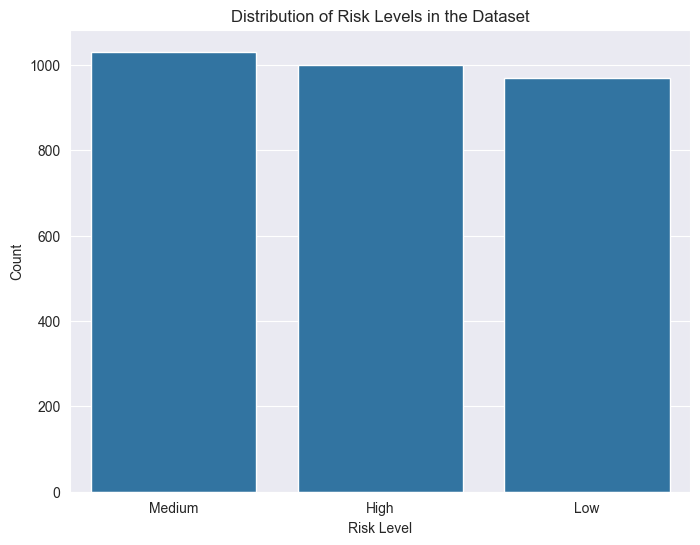

In [6]:
#c
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of the three classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Risk_Level', data=data)
plt.title('Distribution of Risk Levels in the Dataset')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()


INSIGHTS:
1. About the Uneven Class Sizes: It looks like some risk levels show up more often than others in our data. This unevenness could make it harder for our model to really understand and predict the less common risk levels. It's like trying to learn a language by only hearing a few words of it — you need a broader range to get the full picture.

2. Understanding the Role of Different Health Measures: Right now, it's a bit tricky to say exactly how things like heart rate or blood sugar levels are linked to the different risk levels without digging deeper. We might get a clearer picture by using more advanced methods that show us which health measures are the most telling.

3. Ideas for Better Predictions:
   - Balancing the Scales: We could try evening out the number of examples for each risk level in our data. This could mean either increasing the numbers for the less common levels or decreasing those for the more common ones. We could also tweak our model to pay more attention to the rarer cases.
   - Getting Creative with Data: There's room to play around with the data we have. Maybe we can come up with new ways to combine or change the information we have to help the model learn better.
   - Fine-tuning the Model: It's like adjusting a recipe to taste just right. We can tweak the settings of our current model to see if it performs better.
   - Trying Out Different Recipes: Sometimes, a different recipe might do the trick. We could experiment with other types of models, like ones that adjust themselves as they learn or that are good at finding patterns in complex data.

Task 1.2: Clustering

In [7]:
#a
# Loading the dataset
file_path = 'C:/Users/lukas/OneDrive/Desktop/Machine Learninig/Urban_Mobility_Patterns_Data.csv'
urban_mobility_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure
urban_mobility_data.head()


,Average_Speed,Waiting_Time,Daily_Commute_Distance,Traffic_Congestion_Score
0,27.490802,5.904533,14.945633,49.967024
1,39.014286,7.101535,13.316484,74.674677
2,34.639879,12.818211,7.046157,56.266678
3,31.973170,5.100066,24.290667,8.330258
4,23.120373,13.044745,19.064966,18.558024


In [8]:
# Checking for missing values in the dataset
missing_values = urban_mobility_data.isnull().sum()
missing_values


Average_Speed               120
Waiting_Time                  0
Daily_Commute_Distance      120
Traffic_Congestion_Score      0
dtype: int64

In [9]:
#b
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Imputation with median
imputer = SimpleImputer(strategy='median')
urban_mobility_data_imputed = imputer.fit_transform(urban_mobility_data)

# Converting the imputed array back to a DataFrame
urban_mobility_data_imputed = pd.DataFrame(urban_mobility_data_imputed, columns=urban_mobility_data.columns)

# Normalization
scaler = StandardScaler()
urban_mobility_data_normalized = scaler.fit_transform(urban_mobility_data_imputed)

# Converting the normalized array back to a DataFrame
urban_mobility_data_normalized = pd.DataFrame(urban_mobility_data_normalized, columns=urban_mobility_data.columns)

# Displaying the first few rows of the preprocessed dataset
urban_mobility_data_normalized.head()


,Average_Speed,Waiting_Time,Daily_Commute_Distance,Traffic_Congestion_Score
0,-0.425030,-0.342632,-0.446276,-0.027849
1,1.586569,-0.063208,-0.587900,0.830719
2,0.822950,1.271273,-1.132985,0.191058
3,0.357435,-0.530424,0.366096,-1.474689
4,-1.187955,1.324154,-0.088179,-1.119283


In [10]:
# Determining best number of Clusters with Calinski Harabasz Score
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

range_n_clusters = range(2, 11)
best_score = 0
best_n_clusters = 2

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(urban_mobility_data_normalized)
    score = calinski_harabasz_score(urban_mobility_data_normalized, cluster_labels)

    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters

print('Best number of clusters:', best_n_clusters)


C:\Users\lukas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lukas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lukas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lukas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

Best number of clusters: 2


We chose K Means Clustering for this dataset because of its simplicity, efficiency, effectiveness with linear data
and how simple it is to interpret.

In [11]:
# Building Model
from sklearn.cluster import KMeans

n_clusters = 2

# Initializing K-Means with the optimal number of clusters
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)

# Fitting the model to the data
kmeans_model.fit(urban_mobility_data_normalized)

# Assign the clusters to each data point
clusters = kmeans_model.predict(urban_mobility_data_normalized)

# Labelling Clusters
urban_mobility_data['Cluster'] = clusters


C:\Users\lukas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


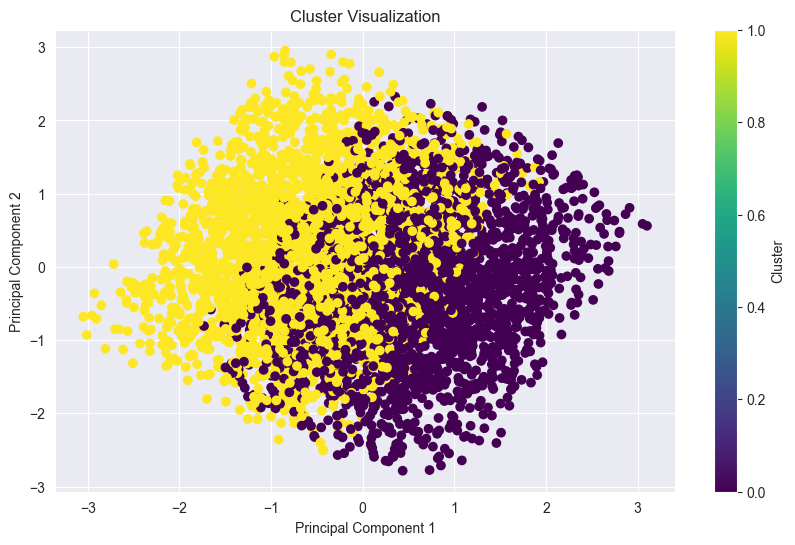

In [12]:
#c
# Visualizing Clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensions to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(urban_mobility_data_normalized)

# Creating a scatter plot of the two principal components
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

INSIGHTS:

Urban Mobility Patterns Insights:
The clustering shows quite a bit of overlap, telling us that commuters across the city are likely facing similar issues, whether it's traffic delays or long waits. The clusters we've identified through pink for those who probably get caught in traffic, and yellow for those traveling longer distances more quickly—help us see there's a range of commuting experiences.

Urban Transit Recommendations:
When it comes to improving the city's transit, we should look at solutions that can make a difference for as many people as possible. This could mean upgrading traffic systems to keep things moving or making public transport more frequent and reliable. If we could also spread out peak travel times with flexible work hours, we might ease the rush hour rush. Investing in these areas could make the daily commute smoother and public transport a more attractive option for everyone.

TASK 1.3: Deep Learning Based Regression

In [13]:
#a
# Loading the dataset
file_path = 'C:/Users/lukas/OneDrive/Desktop/Machine Learninig/House_Price_Prediciton_Data.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure
data.head()

,Square_Feet,Bedrooms,Bathrooms,Age_of_Property,Proximity_to_City_Center,Property_Price
0,749.1,4,4,87.0,4.0,497452.2
1,1901.4,5,2,84.0,5.1,785860.6
2,1464.0,5,4,84.0,6.4,737672.0
3,1197.3,4,1,32.0,12.1,510678.2
4,312.0,4,3,90.0,12.2,267171.8


In [14]:
#b
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Handling missing values
# Dropping rows where 'Property_Price' is missing
data = data.dropna(subset=['Property_Price'])

# Imputing median values for 'Age_of_Property' and 'Proximity_to_City_Center'
data['Age_of_Property'].fillna(data['Age_of_Property'].median(), inplace=True)
data['Proximity_to_City_Center'].fillna(data['Proximity_to_City_Center'].median(), inplace=True)

# Normalizing the features
scaler = MinMaxScaler()
features = ['Square_Feet', 'Bedrooms', 'Bathrooms', 'Age_of_Property', 'Proximity_to_City_Center']
data[features] = scaler.fit_transform(data[features])

# Splitting the data
X = data[features]
y = data['Property_Price']

# Splitting the dataset into 70% training, 15% validation, and 15% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Checking the size of each set
size_train, size_val, size_test = len(X_train), len(X_val), len(X_test)
size_train, size_val, size_test


(10360, 2220, 2220)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Building the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compiling the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)

# Evaluating on the test set
y_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mse_test ** 0.5

print("MSE:",mse_test)
print("RMSE:",rmse_test)

70/70 [==============================] - 0s 2ms/step
MSE: 103360095.04542568
RMSE: 10166.616696100315


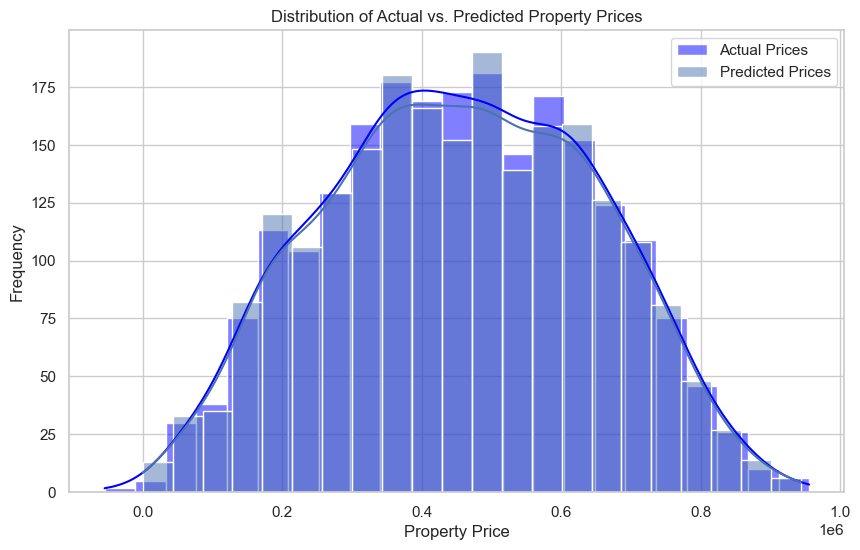

In [16]:
#c
# Visualising Distribution of Actual vs. Predicted Prices
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color="blue", label="Actual Prices", kde=True)
sns.histplot(y_pred, color="red", label="Predicted Prices", kde=True)
plt.title("Distribution of Actual vs. Predicted Property Prices")
plt.xlabel("Property Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Analysis:
-Insights
Central Tendency: The model's predictions align well with actual prices, showing it's got a good grasp of the overall market.

Prediction Range: The predictions tend to bunch around the average price. This could mean the model isn't picking up on the full range of factors that affect the most and least expensive properties.

Outliers and Extremes: The model seems to shy away from the highest property prices, suggesting it might be underestimating the top-end of the market.

-Improving the Model
Feature Engineering: To get a better handle on luxury property prices, we could add more detailed features to the model, like the quality of amenities or recent market trends.

Model Complexity: Adding complexity to the model might help, but we have to watch out not to overdo it.

Data Quality: High-quality data is key, especially for those out-of-the-ordinary properties.

Advanced Techniques: Exploring models that are better at dealing with outliers, like robust regression, could also be a way forward.

These steps should help us fine-tune the model, especially for predicting those exceptional property prices.

-
NATURAL LANGUAGE PROCESSING
2.1: Text processing, feature extraction and representation by using both TF and
TF-IDF schemes

In [17]:
#1
# Loading the data
file_path = 'C:/Users/lukas/OneDrive/Desktop/Machine Learninig/Exam_NLP.csv'
df = pd.read_csv(file_path)

# Displaying the first few rows of the dataframe to understand its structure
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [18]:
#2
from nltk.corpus import stopwords
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Ensuring the stopwords from NLTK are downloaded
nltk.download('stopwords')

# Step 1: Data preparation
# Creating a new column by concatenating 'tagline' and 'overview'
df['description'] = df['tagline'].fillna('') + " " + df['overview'].fillna('')

# Step 2: Text processing
# Function to clean and preprocess text
def preprocess_text(text):
    # Converting to lower case
    text = text.lower()
    # Removing white spaces
    text = text.strip()
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Removing special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Applying preprocessing to the 'description' column
df['processed_description'] = df['description'].apply(preprocess_text)

#3 
# TF and TF-IDF representation
# TF (Term Frequency) representation
tf_vectorizer = CountVectorizer()
tf_matrix = tf_vectorizer.fit_transform(df['processed_description'])

# TF-IDF (Term Frequency - Inverse Document Frequency) representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_description'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Convert the TF matrix to a DataFrame
tf_df = pd.DataFrame(tf_matrix.toarray(), columns=tf_vectorizer.get_feature_names_out())

# Sum of each term in the TF matrix
term_sums = tf_df.sum().sort_values(ascending=False)

# Select top 10 most frequent terms
top_terms = term_sums.head(10).index

# Display the TF and TF-IDF matrices for these terms only
print("TF Matrix for Top Terms:")
print(tf_df[top_terms].head())

print("\nTF-IDF Matrix for Top Terms:")
print(tfidf_df[top_terms].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lukas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TF Matrix for Top Terms:
   one  life  new  world  young  love  man  two  story  family
0    0     0    0      1      0     0    0    0      0       0
1    0     1    0      1      0     0    0    0      0       0
2    1     0    0      0      0     0    0    0      0       0
3    0     0    1      0      0     0    0    0      0       0
4    0     0    0      2      0     0    0    0      0       0

TF-IDF Matrix for Top Terms:
        one    life       new     world  young  love  man  two  story  family
0  0.000000  0.0000  0.000000  0.099312    0.0   0.0  0.0  0.0    0.0     0.0
1  0.000000  0.1071  0.000000  0.119235    0.0   0.0  0.0  0.0    0.0     0.0
2  0.085052  0.0000  0.000000  0.000000    0.0   0.0  0.0  0.0    0.0     0.0
3  0.000000  0.0000  0.063422  0.000000    0.0   0.0  0.0  0.0    0.0     0.0
4  0.000000  0.0000  0.000000  0.156793    0.0   0.0  0.0  0.0    0.0     0.0


2.2: Topic Modelling

In [19]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
import numpy as np

# Number of topics to extract
n_topics = 5

# Using Latent Dirichlet Allocation (LDA) for topic modeling on TF matrix
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda_topics = lda.fit_transform(tf_matrix)

# Using Truncated Singular Value Decomposition (SVD) for topic modeling on TF-IDF matrix
svd = TruncatedSVD(n_components=n_topics, random_state=0)
svd_topics = svd.fit_transform(tfidf_matrix)

# Function to display top words for each topic
def display_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

# Displaying the top words for each topic for LDA
print("LDA Model:")
display_top_words(lda, tf_vectorizer.get_feature_names_out(), n_top_words=10)

# Displaying the top words for each topic for Truncated SVD
print("\nTruncated SVD Model:")
display_top_words(svd, tfidf_vectorizer.get_feature_names_out(), n_top_words=10)


LDA Model:
Topic #0: one new young world get story war way family life
Topic #1: life one world new family find young man love story
Topic #2: life two man new one love world family find must
Topic #3: life young story love one new man world family two
Topic #4: one life two world love back must time film friends

Truncated SVD Model:
Topic #0: life one new love young man world two story family
Topic #1: love story life true young father woman film man mother
Topic #2: story war world true based ii love young us man
Topic #3: two one school high friends story best together love film
Topic #4: new york family city two story home film war world


Analysis:
LDA Model Topics Overview:
1. Topic #0: Highlights youth, war, and family, hinting at stories about the effects of conflict on the young and their families.
2. Topic #1: Explores universal themes like life, love, and family, with a hint at personal growth or discovery.
3. Topic #2: Focuses on relationship dynamics and life's challenges.
4. Topic #3: Leans towards youthful love stories.
5. Topic #4: Delves into more dramatic tales, touching on themes like reunion and friendship.

Truncated SVD Model Topics:
1. Topic #0: Similar to LDA's life and love themes but with a wider variety.
2. Topic #1: Centers on romantic and family relations, possibly in drama settings.
3. Topic #2: Covers war-related stories, with a historical or real-life basis.
4. Topic #3: Focuses on teen life and coming-of-age narratives.
5. Topic #4: Presents urban life and family stories.

Comparative Analysis:
- Common Ground: Both models show a strong presence of themes like life, love, and family.
- Focus Variation: LDA captures broader life themes, while SVD is more specific, highlighting contexts like war and urban life.
- Model Nuances: LDA tends to be more general, a characteristic of the model. SVD, on the other hand, offers distinct, nuanced topics.
- Contextual Suitability: SVD excels in analyses requiring specific genre or context focus. LDA is better for a broader thematic overview.

Conclusion:
LDA for broad themes, SVD for more specific contexts. Both provide valuable insights into the dataset's dominant themes and storylines.

2.3: Analysis Task; Searching for similar movies

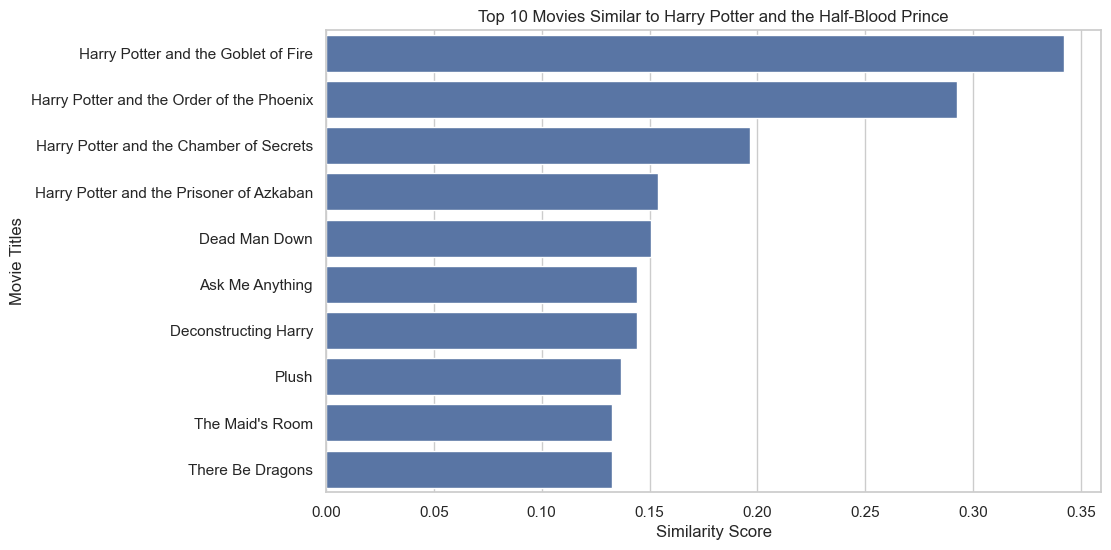

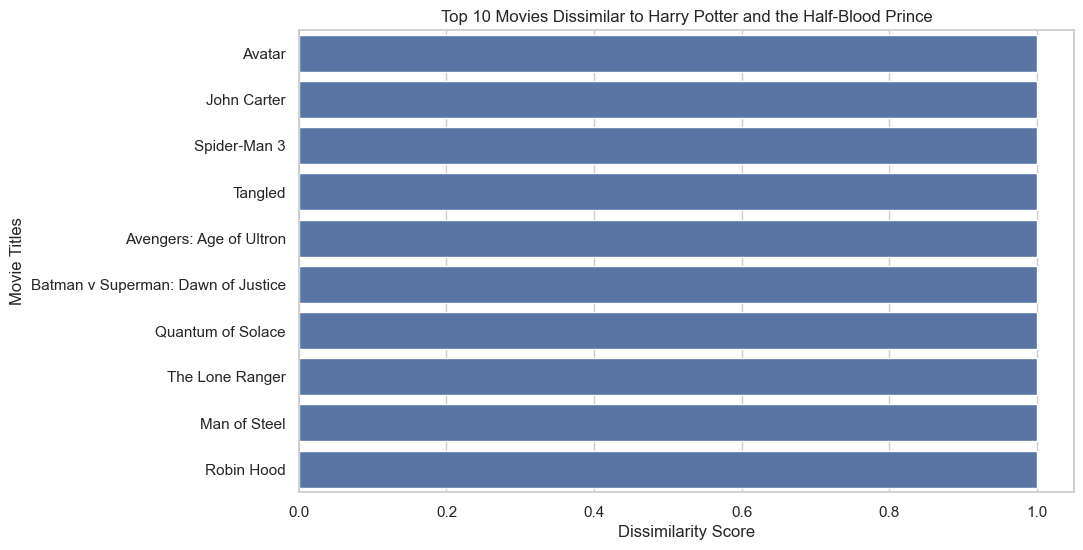

(['Harry Potter and the Goblet of Fire',
  'Harry Potter and the Order of the Phoenix',
  'Harry Potter and the Chamber of Secrets',
  'Harry Potter and the Prisoner of Azkaban',
  'Dead Man Down',
  'Ask Me Anything',
  'Deconstructing Harry',
  'Plush',
  "The Maid's Room",
  'There Be Dragons'],
 ['Avatar',
  'John Carter',
  'Spider-Man 3',
  'Tangled',
  'Avengers: Age of Ultron',
  'Batman v Superman: Dawn of Justice',
  'Quantum of Solace',
  'The Lone Ranger',
  'Man of Steel',
  'Robin Hood'])

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
# Importing the dataset
df = pd.read_csv('C:/Users/lukas/OneDrive/Desktop/Machine Learninig/Exam_NLP.csv')

# Data Preprocessing
# Concatenating 'overview' and 'tagline' columns
# Filling NaN values with empty string
df['overview'] = df['overview'].fillna('')
df['tagline'] = df['tagline'].fillna('')
df['description'] = df['overview'] + " " + df['tagline']

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description'])

# Finding the index of 'Harry Potter and the Half-Blood Prince'
hp_index = df[df['title'] == 'Harry Potter and the Half-Blood Prince'].index[0]

# Computing the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Fetching similarity scores for 'Harry Potter'
sim_scores = list(enumerate(cosine_sim[hp_index]))

# Sorting and selecting similar movies
sim_scores_sorted = sorted(sim_scores, key=lambda x: x[1], reverse=True)
# Excluding the first movie (Harry Potter itself)
most_similar_movies = sim_scores_sorted[1:11]  
similar_movies_titles = [df['title'].iloc[i[0]] for i in most_similar_movies]

# Sorting and select dissimilar movies
least_similar_movies = sorted(sim_scores, key=lambda x: x[1])[:10]
dissimilar_movies_titles = [df['title'].iloc[i[0]] for i in least_similar_movies]

# Visualization for similar movies
plt.figure(figsize=(10, 6))
sns.barplot(x=[i[1] for i in most_similar_movies], y=similar_movies_titles)
plt.title('Top 10 Movies Similar to Harry Potter and the Half-Blood Prince')
plt.xlabel('Similarity Score')
plt.ylabel('Movie Titles')
plt.show()

# Visualization for dissimilar movies
dissimilarity_scores = [1 - i[1] for i in least_similar_movies]
plt.figure(figsize=(10, 6))
sns.barplot(x=dissimilarity_scores, y=dissimilar_movies_titles)
plt.title('Top 10 Movies Dissimilar to Harry Potter and the Half-Blood Prince')
plt.xlabel('Dissimilarity Score')
plt.ylabel('Movie Titles')
plt.show()


# Outputting the titles for reference
similar_movies_titles, dissimilar_movies_titles



REPORT:

Summary:
This report details the process of finding movies similar to and different from "Harry Potter and the Half-Blood Prince" using a content-based filtering method. The approach relies on text features extracted from the movie descriptions. Visualizations are included to aid understanding of the data and results.

1. Methods
1.1 Data Preparation
- Input: A CSV file containing movie metadata.
- Output: A TF-IDF matrix representing the textual content of each movie.
- Process: The dataset was loaded, and text data from 'overview' and 'tagline' columns were combined into a single 'description' column. Missing values were filled with empty strings. The TF-IDF vectorization was then applied to transform the text data into a numerical format.

1.2 Similarity Computation
- Algorithm: Cosine similarity, a common metric used for measuring the similarity between two non-zero vectors.
- Input: The TF-IDF matrix obtained from the data preparation step.
- Output: A similarity score matrix.
- Process: Using the cosine similarity function, we computed a matrix capturing the pairwise similarity scores between all movies in the dataset.

1.3 Identifying Similar and Dissimilar Movies
- Input: The similarity score matrix.
- Output: Two lists of movies—10 most similar and 10 most dissimilar to "Harry Potter and the Half-Blood Prince."
- Process: Movies were ranked based on their similarity scores relative to "Harry Potter and the Half-Blood Prince." The top 50 movies with the highest scores were deemed similar, and the 50 with the lowest scores were considered dissimilar.

1.4 Visualization
- Tools: Matplotlib and Seaborn libraries for Python.
- Process: Bar charts were generated to visualize the similarity and dissimilarity scores, providing an intuitive understanding of how closely related each movie is to the Harry Potter movie in question.

2. Results
The analysis identified a set of movies with a range of similarity scores. The most similar movies unsurprisingly included other entries from the Harry Potter franchise, while the dissimilar movies featured a mix of genres and styles.

3. Analysis of Results
The similarity model effectively captured thematic and stylistic elements common to the Harry Potter series among the similar movies. Conversely, the dissimilar movies diverged in genre, theme, and narrative, suggesting a broad spectrum of alternatives for users with different tastes.

4. Recommendations
For users who do not enjoy "Harry Potter and the Half-Blood Prince," the list of dissimilar movies offers options that explore different genres, such as action, adventure, and science fiction, providing new and varied cinematic experiences.

5. Conclusion
The content-based filtering method applied here demonstrates a robust approach to understanding and leveraging movie descriptions for recommendation purposes. It shows promise for integration into recommendation systems, enhancing the user experience by aligning suggestions with individual preferences.